# Goal

##### 1. To use logistic regression to determine if I can predict if a recipe is a dessert or not?
##### 2. Try looking into ways to balanced imbalanced datasets

Data : https://www.kaggle.com/hugodarwood/epirecipes

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn import linear_model

### Data import and EDA

In [203]:
filepath = '../../input_data/epi_r.csv'

recipes = pd.read_csv(filepath)

In [204]:
recipes.shape

(20052, 680)

In [205]:
recipes.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [206]:
#removing outliers 

# calories are ridiculously high in some.
too_much_cal = recipes.calories < 10000

recipes_fil = recipes[too_much_cal].dropna() #dropping missing values for now TODO: include missing values ? 


Checking what type of variable is calories?

In [207]:
print(recipes_fil.calories.dtype) # looks like a continous variable
recipes_fil.calories.head()

float64


0    426.0
1    403.0
2    165.0
4    547.0
5    948.0
Name: calories, dtype: float64

In [208]:
print(recipes_fil.dessert.dtype)
print(recipes.dessert.head())

float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: dessert, dtype: float64


In [209]:
# Hmmm is it a binary variable ?
recipes.dessert.unique()

array([0., 1.])

Looks like it. Lets try using **Logistic regression** to help our prediction. 

---
Lets look into our output variable a little bit. 

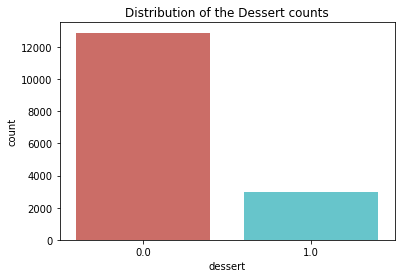

In [210]:
y = recipes_fil.dessert

sns.countplot(x = y, palette='hls')

plt.title("Distribution of the Dessert counts")
plt.show()

There's a lot many non-desserts than desserts. This is an example of an **imbalanced dataset**, where the target variables has many more rows belonging to one category than another. Lets try to quantify this imbalance. 

In [211]:
is_dessert = y == 1
not_dessert = y == 0
total = y.count()

is_dessert_percent = round((y[is_dessert].count()/ total) * 100, 2)
not_dessert_percent = round((y[not_dessert].count()/ total) * 100, 2)

print("Percent of dessert : ", is_dessert_percent)
print("Percent of non - dessert: ", not_dessert_percent)

Percent of dessert :  18.61
Percent of non - dessert:  81.39


---
##### Some exploration 

In [212]:
recipes_fil.groupby('dessert').mean()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
dessert,,,,,,,,,,,,,,,,,,,,,
0.0,3.748110,483.679023,24.640791,28.237611,812.905079,0.000000,0.000078,0.001163,0.001163,0.000543,...,0.001551,0.022102,0.000078,0.000388,0.017216,0.000155,0.000388,0.001241,0.000620,0.026134
1.0,3.814874,515.030190,6.672320,25.988467,222.051221,0.002035,0.000000,0.000000,0.001696,0.000000,...,0.000000,0.024084,0.000000,0.000000,0.001018,0.000000,0.000000,0.001696,0.001696,0.000000


Well you see straightaway that avg. calories are higher for desserts than for non-desserts. But not by much.  
Protein, sodium is lower in desserts.  
Yes you cannot have a salty dessert. Or can you ?  
Also do people rate sweeter stuff as higher ? Hmm... the sweeter it is , the happier you are when you rate ? 😉

In [213]:
x = [col for col in recipes_fil if 'sugar' in col or col in ['dessert', 'calories']]
recipes_fil[x].groupby('dessert').mean()

,calories,low sugar,low/no sugar,no sugar added,sugar conscious,sugar snap pea
dessert,,,,,,
0.0,483.679023,0.000853,0.016983,0.184257,0.146026,0.004343
1.0,515.030190,0.000000,0.001018,0.012551,0.010176,0.000000


In [214]:
# lets look into ingredients commonly found in desserts ?

# lets first select the desserts 
desserts_df = recipes_fil[recipes_fil.dessert == 1]

In [215]:
bo = desserts_df.any(axis = 'columns')
non_zero_columns = (desserts_df[bo] != 0).any()

#ingredients df
desserts_df = desserts_df.loc[:, non_zero_columns]


#Hmm, lets see what ingredients people use in dessert recipes. 
desserts_df.columns.values

array(['title', 'rating', 'calories', 'protein', 'fat', 'sodium',
       '#cakeweek', '3-ingredient recipes', 'advance prep required',
       'alcoholic', 'almond', 'amaretto', 'anise', 'anniversary',
       'appetizer', 'apple', 'apple juice', 'apricot', 'arizona',
       'asian pear', 'atlanta', 'avocado', 'back to school',
       'backyard bbq', 'bacon', 'bake', 'banana', 'barley', 'basil',
       'bastille day', 'bean', 'beer', 'berry', 'birthday', 'blackberry',
       'blender', 'blue cheese', 'blueberry', 'boil', 'bon appétit',
       'bon app��tit', 'boston', 'bourbon', 'brandy', 'bread',
       'breadcrumbs', 'breakfast', 'broil', 'brooklyn', 'brownie',
       'brunch', 'buffet', 'butter', 'buttermilk', 'butterscotch/caramel',
       'cabbage', 'cake', 'california', 'calvados', 'cambridge',
       'campari', 'canada', 'candy', 'candy thermometer', 'cantaloupe',
       'cardamom', 'carrot', 'cashew', 'casserole/gratin', 'chambord',
       'champagne', 'chartreuse', 'cheddar', 'c

In [216]:
desserts_df.groupby('zucchini').count()

,title,rating,calories,protein,fat,sodium,#cakeweek,3-ingredient recipes,advance prep required,alcoholic,...,weelicious,wheat/gluten-free,whiskey,white wine,whole wheat,wine,winter,yogurt,snack,snack week
zucchini,,,,,,,,,,,,,,,,,,,,,
0.0,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,...,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945
1.0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


Whoa !! Who uses zucchini in their desserts ? 

In [217]:
desserts_df[desserts_df.zucchini == 1][['title', 'calories']]

# ok ok not judging. 

,title,calories
6087,Zucchini-Pecan Cake with Cream Cheese Frosting,453.0
9865,Fudgy Orange-Zucchini Cake with Orange Glaze,323.0
15531,Spiced Zucchini Bread,300.0


I also see names of some cities, states and countries. TODO: Lets work on removing these. 

### Lets look into using only calories to predict whether a recipe is a dessert. 
Meaning we're using only one variable to predict the dessert (1) or non-dessert (0) status. 

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Lets split our original data into training and test data. *Remember, we have'nt balanced this dataset yet.*

In [219]:
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, test_X, train_y, test_y = train_test_split(recipes_fil, 
                                                    y, 
                                                    train_size = 0.7, # 70: 30 split
                                                    test_size = 0.3,
                                                    random_state = 0)

## X 
im_X = train_X[['calories']] # Looking at only one variable for now

In [220]:
pd.Series(train_y).value_counts()

0.0    9003
1.0    2087
Name: dessert, dtype: int64

Lets now create our model on imbalanced data

In [221]:
# Fitting the model 

logis = LogisticRegression(random_state=0, solver='liblinear')
logis_model = logis.fit(im_X, train_y)

# Making predictions using the 'unseen' test_X[['calories']] this dataset should not be augmented (balanced)

pred_1 = logis_model.predict(test_X[['calories']])

Lets try evaluating it ! 

In [222]:
# calculate accuracy
print(metrics.accuracy_score(test_y, pred_1))

0.8188512518409425


Hmmph ! This is pretty good in predicting dessert status right? Even when we used an imbalanced dataset i.e. we didnt have enough training instances for our positive class (is a dessert) and we still got a pretty good accuracy.  
  
So , fixing the imbalance should only improve the accuracy, right?  <font color=GREEN>TODO: WHY is balancing required in this data ?</font>
  
Let's try figuring out that next. 

---

### Handling class Imbalance. 

What we're trying to do in this topic is create a 1:1 ratio of the two types of target classes i.e. dessert and non-dessert.  We do this so that our model can detect either class with equal power. If we don't balance our target variable our model will be trained to detect one one target class (guess which one) better than the other. In some cases this is what you may need as well. It all depends on what you want your model to do. 
  
  
#### <font color=RED>NOTE:</font> 
Always do the balancing AFTER the test train split, because in our test data (which the model never sees) the distribution of the target classes should be as REAL as possible. This will be the true test of how good our model performs and we should <font color=red>test</font> the model on an unaugmented, imbalanced _test_ dataset. 
  
  
  
Here lets try 2 commonly used techniques 
* Undersampling -- reduces the number of training instances of the majority target class seen in the data 
* Oversampling -- increases the number of training instances of the minority target class seen in the data

#### Undersampling

In [223]:
# Lets shuffle the data before creating the subsamples
train_X = train_X.sample(frac=1, random_state=0)

# number of instances which are desserts in the training dataset
is_dessert = train_X['dessert'].astype(int) == 1
isnot_dessert = train_X['dessert'].astype(int) == 0


desserts_df = train_X[is_dessert]
non_desert_df = train_X[isnot_dessert]

#Lets pick up the same number of records from the majority class
non_desert_df_un = non_desert_df.iloc[:len(train_X[is_dessert])]

# amount of minority class 
print("Count of minority class is : ", len(train_X[is_dessert]))

#amount of majority class 
print("Count of majority undersamples class is : ", len(non_desert_df_un))

Count of minority class is :  2087
Count of majority undersamples class is :  2087


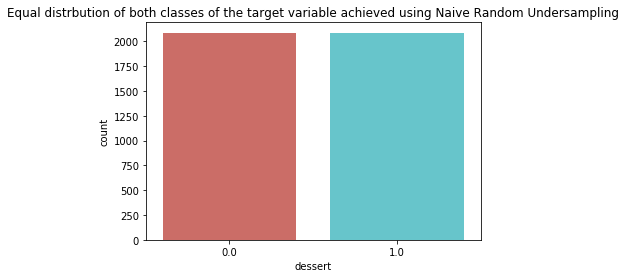

In [224]:
#generating a balanced input dataset
co_df = pd.concat([desserts_df, non_desert_df_un], axis=0)

# Shuffle dataframe rows _un for undersampling
ba_recipes_df_un = co_df.sample(frac= 1, random_state = 0)

#lets confirm 
sns.countplot(x = ba_recipes_df_un.dessert, palette='hls')
plt.title('Equal distrbution of both classes of the target variable achieved using Naive Random Undersampling')
plt.show()

The distribution now looks more even compared to earlier. Remember this dataset, we'll use it again while comparing models generated from different kinds of datasets (imbalanced, balanced using oversampling, balanced using undersampling etc...).  
  

**One problem** with the random undersampling is that we are underutilizing the potential of the dataset. We are throwing away all those extra instances of the majority class which could have helped train the model. So there is **'information loss'**. When we have a VERY large dataset, this is more acceptable.

#### Oversampling
We will go over two (more in the future) commonly used kinds of oversampling :
* Random Oversampling 
* Synthetic Minority Oversampling Technique (SMOTE)

##### Random Oversampling 
This is the most naive strategy where we create new samples by simply using copies of existing samples, i.e. sampling using *replacement* of the current available minority class. The sample should match the number of instances of the majority class, so that the latter doesn't take over during training. 

In [225]:
from imblearn.over_sampling import RandomOverSampler

In [226]:
r_osampler = RandomOverSampler(random_state = 0, sampling_strategy='minority')
X_over , y_over = r_osampler.fit_resample(train_X, train_y)

In [227]:
X_over = pd.DataFrame(X_over, columns = train_X.columns)
X_over.head()
# Looking good. 

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,Grilled Corn and Shrimp Salad,4.375,298,15,14,450,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Spiced Pear and Raisin Pie,3.75,246,2,1,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Beets with Stout and Sauteed Beet Greens,4.375,176,12,7,1353,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"""Virgin Mary"" Aspic",0,180,5,11,479,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Wilted Red Cabbage and Bell Pepper Slaw,3.75,193,2,11,461,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


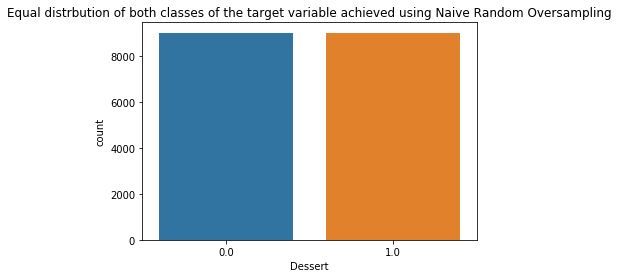

In [228]:
sns.countplot(x = pd.Series(y_over))
plt.title('Equal distrbution of both classes of the target variable achieved using Naive Random Oversampling')
plt.xlabel('Dessert')
plt.show()

Neat, the oversampling increased the sampling of our minority class!!  
However, remember that resampling with replacement will invariably lead to some duplicates. So our model is being trained on the many identical instances.  This may work, but when the test data has instances that are similar and not identical, will it perform that well? 
  
This is why we will now look into SMOTE as another technique for over sampling. 

#### SMOTE
What this technique does is create synthetic a.k.a. fake data samples following a particular distribution which is inherent in the data. So it generates simialr but not identical fake samples. And it leverages the data to create these fake instances. 

In [229]:
from imblearn.over_sampling import SMOTE

# Look at SmoteNC when using continous and nominal data. 
# Right now we're looking at calories alone, which is a continuous variable, so lets stick with SMOTE. 

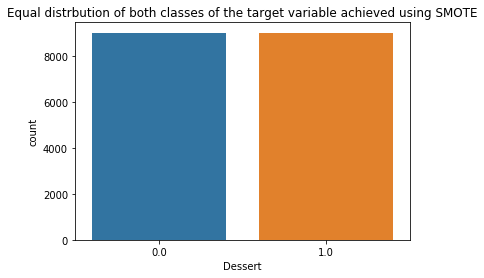

In [230]:
num_train_X = train_X.drop(['title'], axis = 1)

#SMOTE
sm_sampler = SMOTE(random_state=0, sampling_strategy='minority')
X_sm, y_sm = sm_sampler.fit_resample(num_train_X, train_y)
X_sm = pd.DataFrame(X_sm, columns=num_train_X.columns)


#PLOT to see sampling output
sns.countplot(x = pd.Series(y_sm))
plt.title('Equal distrbution of both classes of the target variable achieved using SMOTE')
plt.xlabel('Dessert')

plt.show()

### Model training using the balanced datasets

Lets recollect our datasets shall we :
* `ba_recipes_df_un` -- random undersampling 
* `X_over, y_over` -- random oversampling
* `X_sm, y_sm` -- SMOTE 

In [231]:
print(ba_recipes_df_un.calories.shape)
print(X_over.shape)
print(X_sm.shape)

(4174,)
(18006, 680)
(18006, 679)


In [232]:
un_log_model = logis.fit(ba_recipes_df_un[['calories']], ba_recipes_df_un['dessert']) # using the under sampled dataset 
over_log_model = logis.fit(X_over[['calories']], y_over) # using the randomly over sampled dataset
sm_log_model = logis.fit(X_sm[['calories']], y_sm) # using the SMOTE over sampling 

### Lets make our predictions using the above models 
Remember to use the original unaugmented test dataset.

In [233]:
un_pred = un_log_model.predict(test_X[['calories']])
over_pred = over_log_model.predict(test_X[['calories']])
sm_pred = sm_log_model.predict(test_X[['calories']])

### Model evaluations
Lets see if the three sampling strategies helped create better or poorer models compared to the model trained on imbalanced data (remember logis_model ?) 

In [234]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, precision_score,roc_curve, recall_score, classification_report


In [235]:
# calculate accuracy
print("Accuracy when predictions are made with undersampling", metrics.accuracy_score(test_y, un_pred))
print("Accuracy when predictions are made with naive over sampling", metrics.accuracy_score(test_y, over_pred))
print("Accuracy when predictions are made with Smote", metrics.accuracy_score(test_y, sm_pred))

Accuracy when predictions are made with undersampling 0.39322533136966126
Accuracy when predictions are made with naive over sampling 0.39322533136966126
Accuracy when predictions are made with Smote 0.39322533136966126


Hmm.....this looks a bit off. Lets investigate the results a little further. 

In [236]:
precision_score(test_y, pred_1) # our first baseline model 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [237]:
pd.Series(pred_1).value_counts()

0.0    4753
dtype: int64

Ok, no wonder, our model metrics are messed up.....its predicting all the samples as non-dessert. Even our augmented balanced datasets are not training the models well enough for predicting 'dessert' status. 

In [238]:
precision_score(test_y, un_pred) ## Same thing again for logistic model trained on the randomly undersampled dataset. 

0.18616196090598822

In [239]:
# reference from here 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
#slightly modified for this data

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=['0', '1'], yticklabels=['0', '1'],
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[1269 2623]
 [ 261  600]]


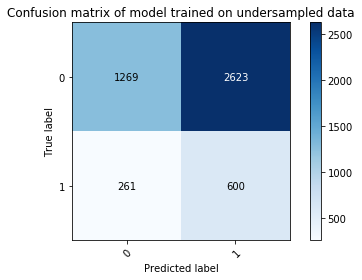

In [240]:
plot_confusion_matrix(test_y, un_pred, classes=['0', '1'], normalize=False,title='Confusion matrix of model trained on undersampled data')

Confusion matrix, without normalization
[[1269 2623]
 [ 261  600]]


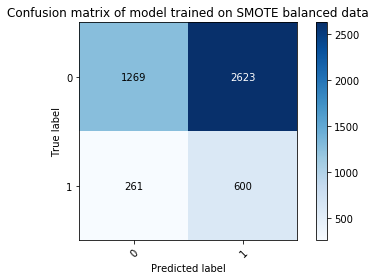

In [241]:
plot_confusion_matrix(test_y, sm_pred, classes=['0', '1'], normalize=False,title='Confusion matrix of model trained on SMOTE balanced data')

What could we do? 

1. Try cross validation? Because a single arbitrary train-test split does not give us a good model performance metric. And the performance metric will be influenced by the way the data has been split. 
    * It will not truly represent the ability of the model to generalize to unseen data.
2. May be calories alone cannot be used to predict 'dessert' status of a recipe. May be we need more features. 
3. Or may be another classification model ?  
   
 
Lets try the first option.  
The second option would require special handling of the variables (categorical) and will be included in another notebook.   
Another classification model is ofcourse the content of a separate notebook since the goal here was to look at Logistic regression.

### Cross Validation